# Analisis Exploratorio (EDA) Ejercicio

Raul Jimenez 19017

Oscar Saravia 19322

Donaldo Garcia 19683

In [1]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns
import random

## 1. (3 puntos) Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos. 

In [150]:
movies = pd.read_csv('./movies.csv', encoding ='latin1')
movies.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


In [3]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,2.498768e+05,2.573801e+05,5.000,12286.50000,152558.0000,4.520218e+05,9.222600e+05
budget,10000.0,1.855163e+07,3.662669e+07,0.000,0.00000,500000.0000,2.000000e+07,3.800000e+08
revenue,10000.0,5.673793e+07,1.495854e+08,0.000,0.00000,163124.5000,4.479661e+07,2.847246e+09
runtime,10000.0,1.002681e+02,2.777783e+01,0.000,90.00000,100.0000,1.130000e+02,7.500000e+02
popularity,10000.0,5.139391e+01,2.167296e+02,4.258,14.57775,21.9055,4.065400e+01,1.147465e+04
voteAvg,10000.0,6.483490e+00,9.842740e-01,1.300,5.90000,6.5000,7.200000e+00,1.000000e+01
voteCount,10000.0,1.342382e+03,2.564197e+03,1.000,120.00000,415.0000,1.316000e+03,3.078800e+04
genresAmount,10000.0,2.596500e+00,1.154565e+00,0.000,2.00000,3.0000,3.000000e+00,1.600000e+01
productionCoAmount,10000.0,3.171400e+00,2.539738e+00,0.000,2.00000,3.0000,4.000000e+00,8.900000e+01
productionCountriesAmount,10000.0,1.751000e+00,3.012093e+00,0.000,1.00000,1.0000,2.000000e+00,1.550000e+02


## 2. (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta) 

- id: id de la película **cualitativo, ordinal**
- popularity: Índice de popularidad de la película calculado semanalmente **cuantitativo, continuo** 
- budget: El presupuesto para la película **cuantitativo, continua** 
- revenue: El ingreso de la película **cuantitativo, continua**
- original_title: El título original de la película, en su idioma original **cualitativa, nominal** 
- originalLanguage: Idioma original en que se encuentra la película **cualititva, nominal**
- title: El título de la película traducido al inglés **cualitativa, nominal**
- homePage: La página de inicio de la película **cualitativa, nomial**
- video: Si tiene videos promocionales o no **cualitativa, nominal**
- director: Director de la película **cualitativo, nominal**
- runtime: La duración de la película **cuantitativo, continuo**
- genres: El género de la película **cualitativa, nominal**
- genresAmount: Cantidad de géneros que representan la película **cuantitativo, discreto**
- productionCompany: Las compañías productoras de la película **cualitativa, nominal**
- productionCoAmount: Cantidad de compañías productoras que participaron en la película **cuantitativo, discreto**  
- productionCompanyCountry: Países de las compañías productoras de la película **cualitativa, nominal**
- productionCountry: Países en los que se llevó a cabo la producción de la película **cualitativo, nominal**
- productionCountriesAmount: Cantidad de países en los que se rodó la película **cuantitativa, discreta**
- releaseDate: Fecha de lanzamiento de la película **cuantitativo, discreto**
- voteCount: El número de votos en la plataforma para la película **cuantitativo, discreto**
- voteAvg: El promedio de los votos en la plataforma para la película **cuantitativo, continuo**
- actors: Actores que participan en la película (Elenco) **cualitativo, nominal**
- actorsPopularity: Índice de popularidad del elenco de la película **cuantiativo, continuo**
- actorsCharacter: Personaje que interpreta cada actor en la película **cualitativo, nominal** 
- actorsAmount: Cantidad de personas que actúan en la película **cuantitativo, discreto**
- castWomenAmount: Cantidad de actrices en el elenco de la película **cuantitativo, discreto**
- castMenAmount: Cantidad de actores en el elenco de la película. **cuantitativo, discreto**

## 3.(6 puntos) Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

### Tabla de frecuencias

In [4]:
movies.count()

id                           10000
budget                       10000
genres                        9947
homePage                      4193
productionCompany             9543
productionCompanyCountry      8720
productionCountry             9767
revenue                      10000
runtime                      10000
video                         9514
director                      9926
actors                        9920
actorsPopularity              9913
actorsCharacter               9953
originalTitle                10000
title                        10000
originalLanguage             10000
popularity                   10000
releaseDate                  10000
voteAvg                      10000
voteCount                    10000
genresAmount                 10000
productionCoAmount           10000
productionCountriesAmount    10000
actorsAmount                 10000
castWomenAmount              10000
castMenAmount                10000
dtype: int64

### popularity 
Se puede determinar que la variable de popularity **NO** sigue una distribucion normal debido a que el histograma no sigue la forma de campana, en el boxplot se puede observar como es que la mayoria de los datos no entran en la caja al igual que en el diagrama QQ se puede observar que los datos son muy distintos entre si.

In [5]:
pd.value_counts(movies.popularity)

9.336     4
12.273    4
11.878    4
13.196    4
14.134    4
         ..
57.905    1
22.598    1
13.058    1
9.713     1
83.747    1
Name: popularity, Length: 8972, dtype: int64

In [6]:
pd.value_counts(movies.popularity)

9.336     4
12.273    4
11.878    4
13.196    4
14.134    4
         ..
57.905    1
22.598    1
13.058    1
9.713     1
83.747    1
Name: popularity, Length: 8972, dtype: int64

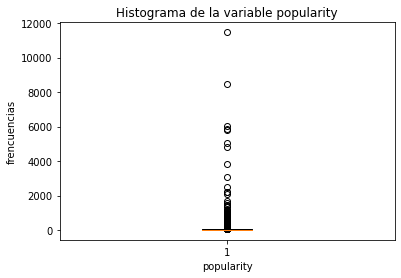

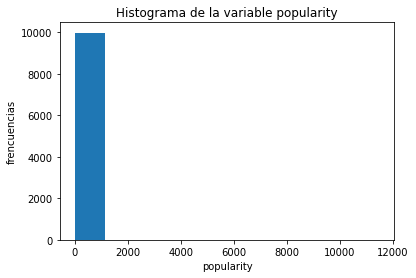

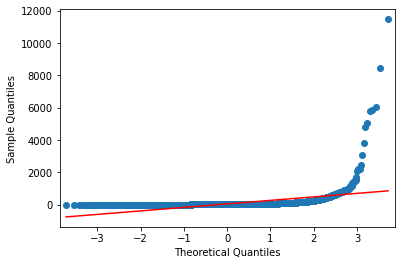

In [7]:
plt.boxplot(x = movies.popularity.dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

plt.hist(x = movies.popularity.dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.popularity.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

#### popularity sin datos atipicos (menores < 1000)

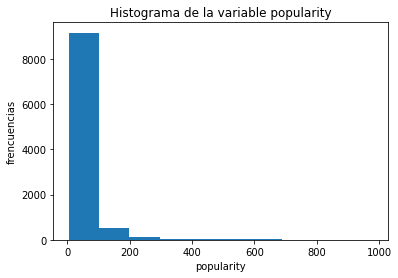

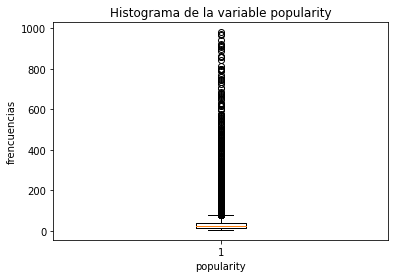

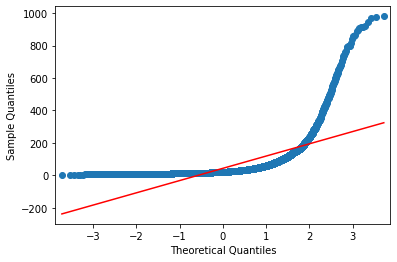

In [8]:
plt.hist(x = movies.popularity[movies.popularity < 1000].dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

plt.boxplot(x = movies.popularity[movies.popularity < 1000].dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.popularity[movies.popularity < 1000].dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### budget NO ES PONER POR QUE

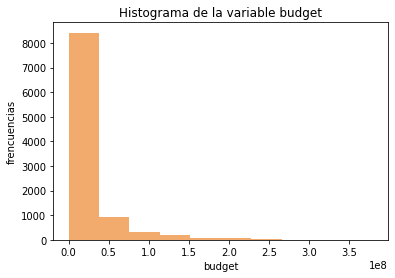

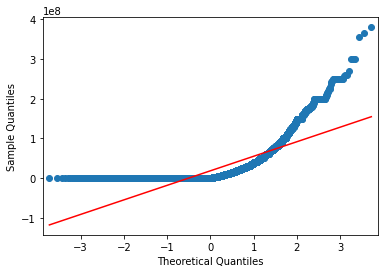

In [9]:
plt.hist(x = movies.budget.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable budget')
plt.xlabel('budget')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.budget.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### revenue NO ES, PONER POR QUE

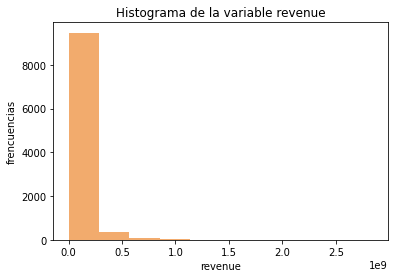

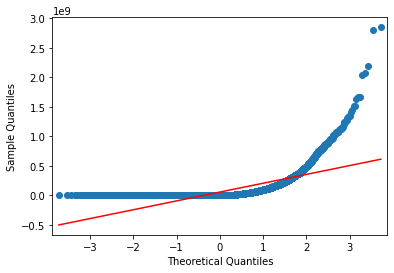

In [10]:
plt.hist(x = movies.revenue.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable revenue')
plt.xlabel('revenue')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.revenue.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### runtime NO ES, PONER POR QUE

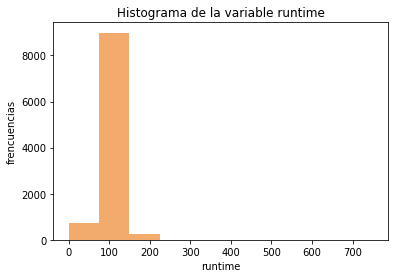

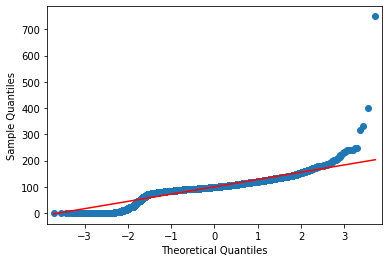

In [11]:
plt.hist(x = movies.runtime.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable runtime')
plt.xlabel('runtime')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.runtime.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### genresAmount NO ES, PONER POR QUE

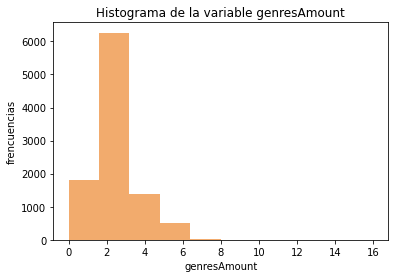

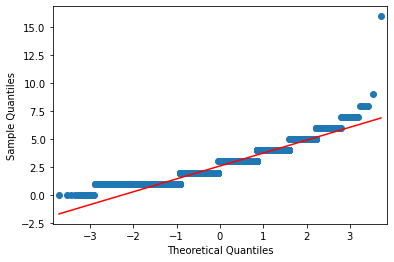

In [12]:
plt.hist(x = movies.genresAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable genresAmount')
plt.xlabel('genresAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.genresAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### productionCoAmount

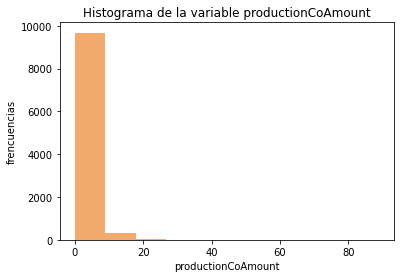

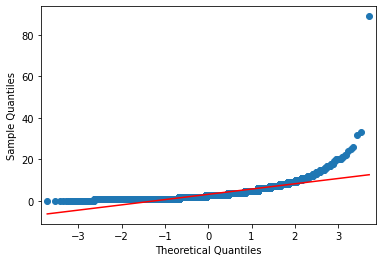

In [13]:
plt.hist(x = movies.productionCoAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable productionCoAmount')
plt.xlabel('productionCoAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.productionCoAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### productionCountriesAmount

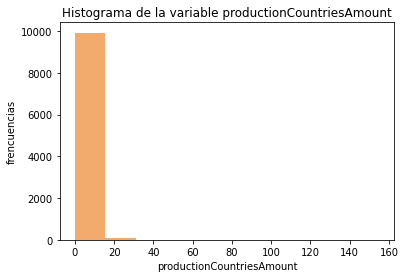

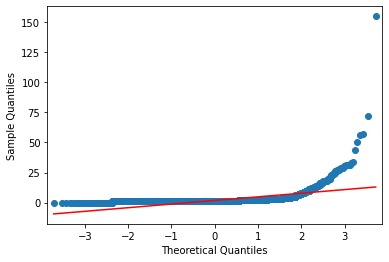

In [14]:
plt.hist(x = movies.productionCountriesAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable productionCountriesAmount')
plt.xlabel('productionCountriesAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.productionCountriesAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### releaseDate

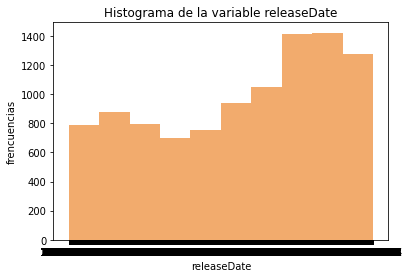

In [15]:
plt.hist(x = movies.releaseDate.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable releaseDate')
plt.xlabel('releaseDate')
plt.ylabel('frencuencias')
plt.show()


### voteCount

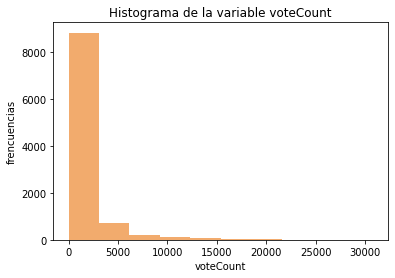

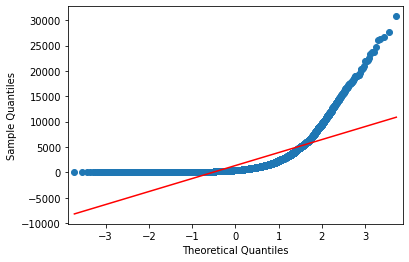

In [16]:
plt.hist(x = movies.voteCount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable voteCount')
plt.xlabel('voteCount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.voteCount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### voteAvg

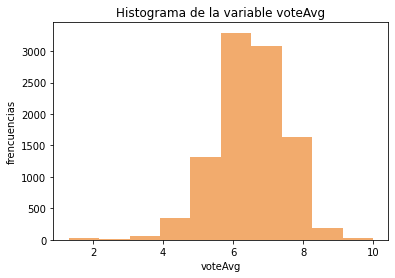

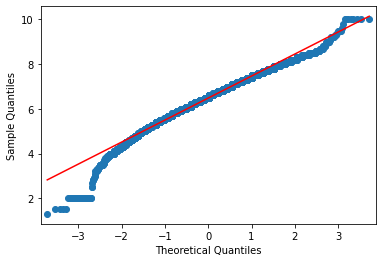

In [17]:
plt.hist(x = movies.voteAvg.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable voteAvg')
plt.xlabel('voteAvg')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.voteAvg.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### actorsAmount

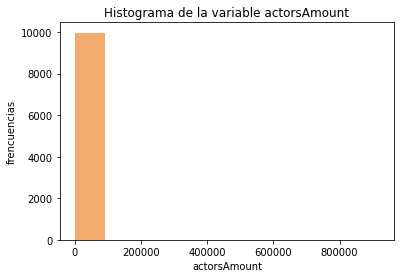

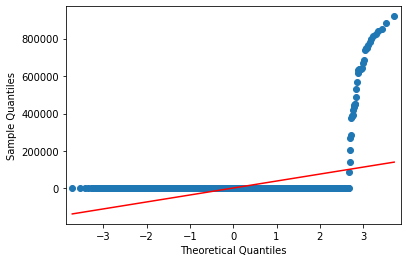

In [18]:
plt.hist(x = movies.actorsAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable actorsAmount')
plt.xlabel('actorsAmount')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.actorsAmount.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### castWomenAmount

In [152]:
movies['castWomenAmount'] = movies['castWomenAmount'].apply(lambda x: int(x) if str.isdigit(x) and int(x) < 500  else 0)


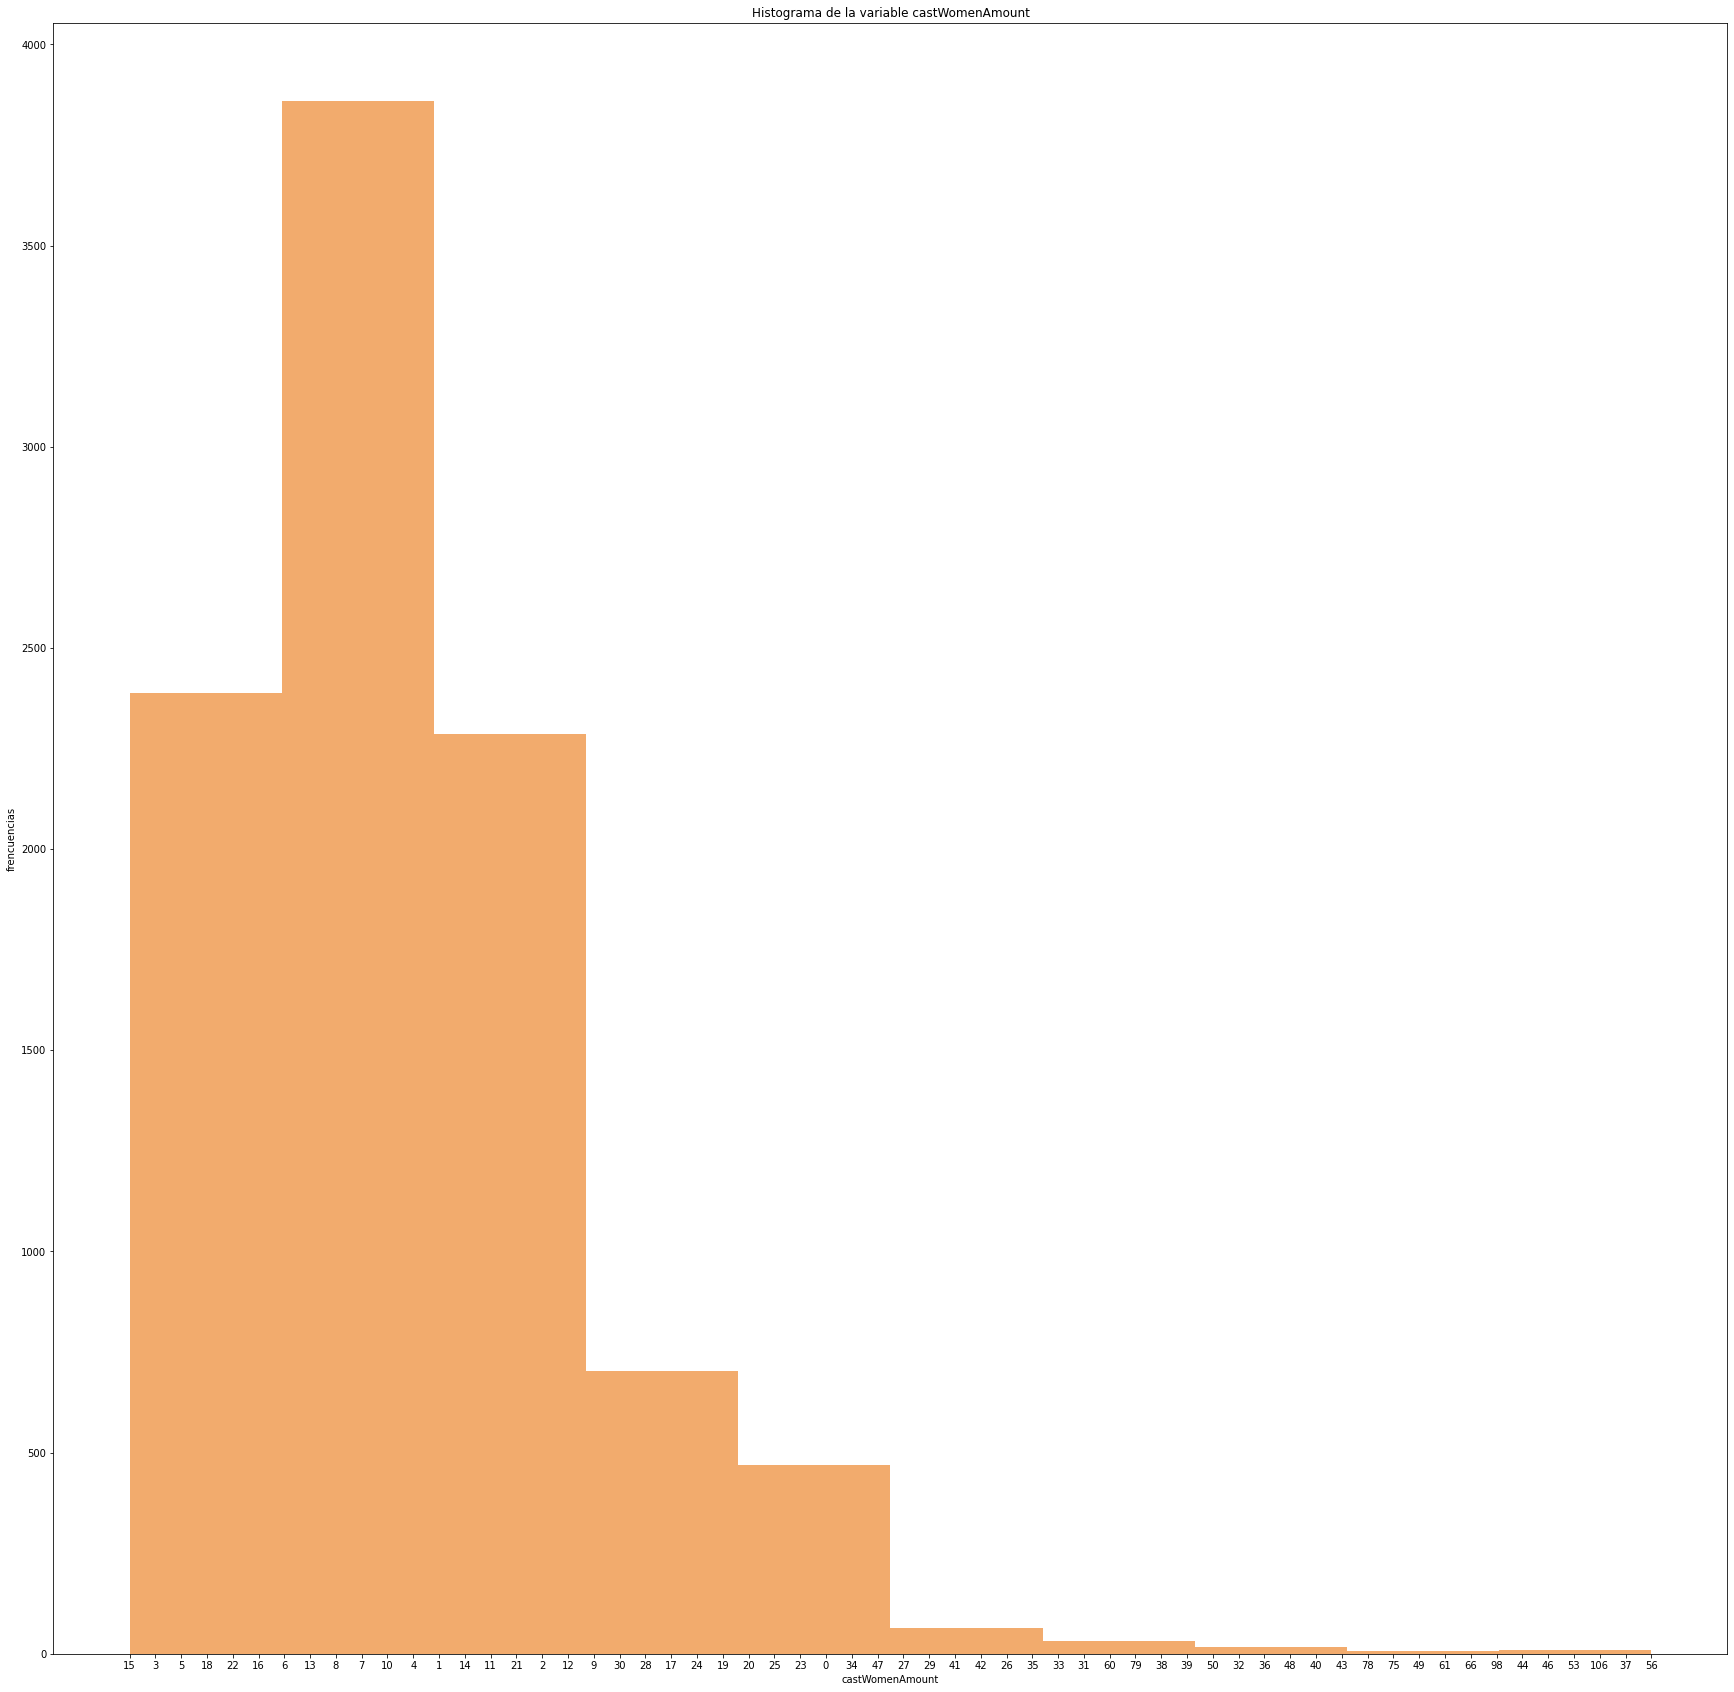

In [20]:
plt.hist(x = movies.castWomenAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable castWomenAmount')
plt.xlabel('castWomenAmount')
plt.ylabel('frencuencias')
plt.rcParams['figure.figsize'] = (30, 30)
plt.show()

# distribucion_generada = movies.castWomenAmount.dropna()
# # Represento el Q-Q plot
# qqplot(distribucion_generada , line='s')
# plt.show()


### castMenAmount

In [151]:
movies['castMenAmount'] = movies['castMenAmount'].apply(lambda x: int(x) if str.isdigit(x) and int(x) < 500  else 0)

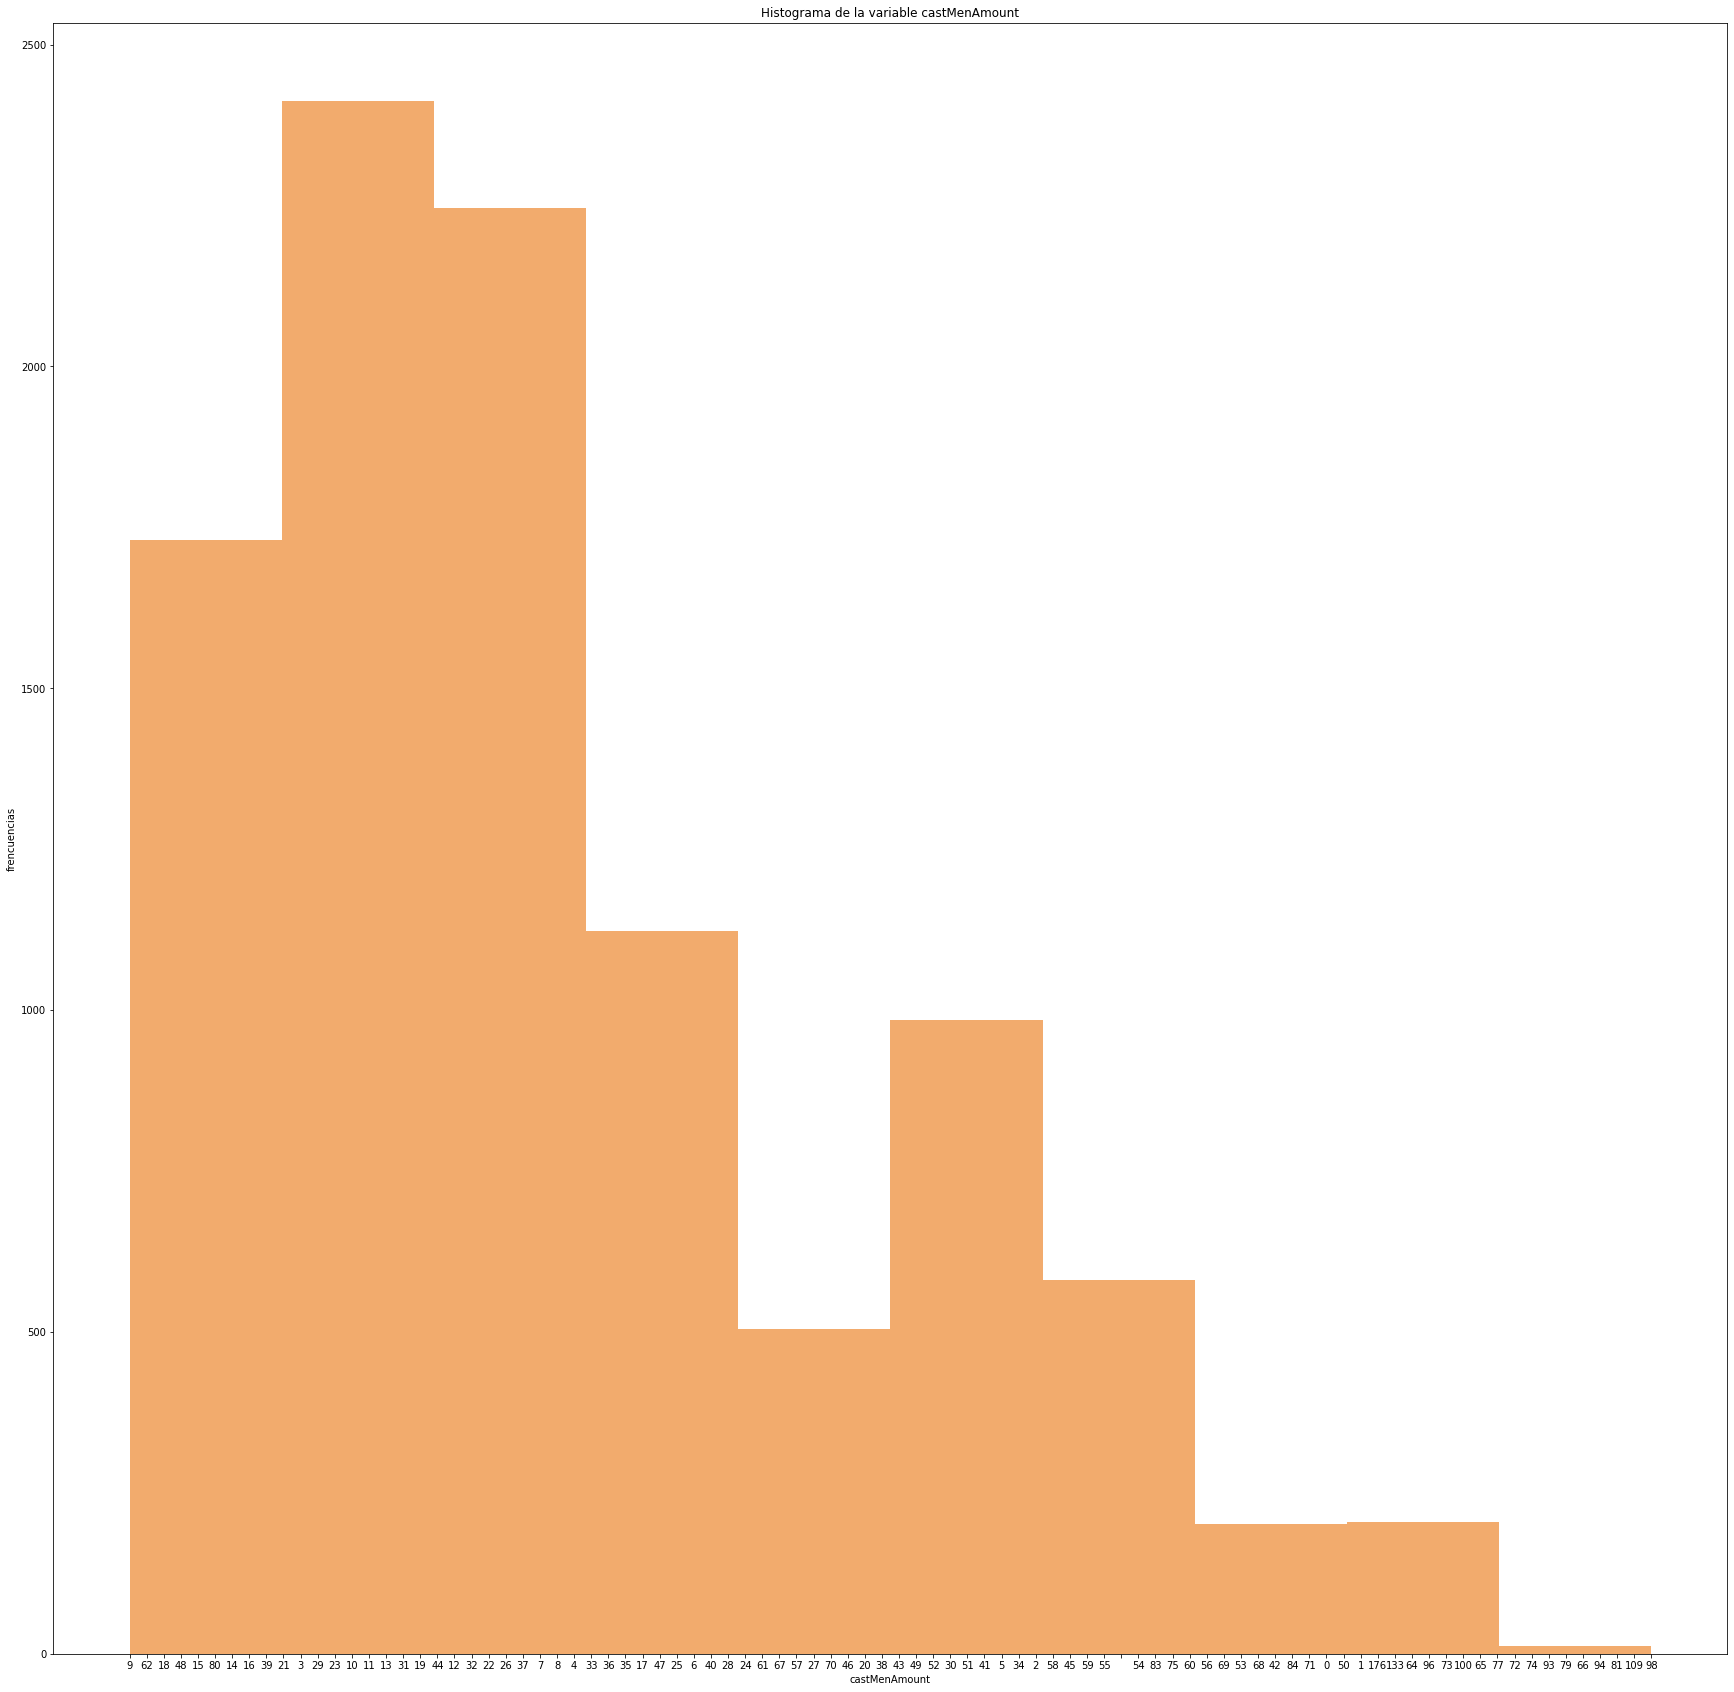

In [21]:
plt.hist(x = movies.castMenAmount.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable castMenAmount')
plt.xlabel('castMenAmount')
plt.ylabel('frencuencias')
plt.rcParams['figure.figsize'] = (30, 30)
plt.show()

# distribucion_generada = movies.castMenAmount.dropna()
# # Represento el Q-Q plot
# qqplot(distribucion_generada , line='s')
# plt.show()


## 4. Responda las siguientes preguntas: 

### 4.1 (3 puntos) ¿Cuáles son las 10 películas que contaron con más presupuesto?

Se usa la tabla para mostrar las 10 peliculas que contaron con mas presupuesto

In [21]:
movies.nlargest(10, 'budget')['title']

716     Pirates of the Caribbean: On Stranger Tides
4710                        Avengers: Age of Ultron
5952                              Avengers: Endgame
163        Pirates of the Caribbean: At World's End
4953                                 Justice League
5953                         Avengers: Infinity War
607                                Superman Returns
3791                                        Tangled
7134                                  The Lion King
280                                    Spider-Man 3
Name: title, dtype: object

### 4.2 (3 puntos) ¿Cuáles son las 10 películas que más ingresos tuvieron? 

Se usa la tabla para mostrar cuales fueron las 10 peliculas que mas ingresos tuvieron

In [22]:
movies.nlargest(10, 'revenue')['title']

3210                          Avatar
5952               Avengers: Endgame
307                          Titanic
4947    Star Wars: The Force Awakens
5953          Avengers: Infinity War
4914                  Jurassic World
7134                   The Lion King
9049         Spider-Man: No Way Home
3397                    The Avengers
5087                       Furious 7
Name: title, dtype: object

### 4.3 (3 puntos) ¿Cuál es la película que más votos tuvo?

Se usa el comando nlargest para mostar cual es la pelicula con mayor cantidad de votos

In [23]:
movies.nlargest(1, 'voteCount')['title']

3511    Inception
Name: title, dtype: object

### 4.4 (3 puntos) ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

Se usa el comando nsmallest para mostrar la pelicula que menor cantidad de votos y asi determinar que es la peor pelicula

In [24]:
movies.nsmallest(1, 'voteAvg')['title']

9786    DAKAICHI -I'm Being Harassed by the Sexiest Ma...
Name: title, dtype: object

### 4.5 (8  puntos)  ¿Cuántas  películas  se  hicieron  en  cada  año?  ¿En  qué  año  se  hicieron  más películas? Haga un gráfico de barras 

- Se usa la tabla y la grafica para determinar la cantidad de peliculas que se hicieron cada año
- En base a esos datos se puede determinar que en el año 2021 se hicieron mas peliculas, pasando las 800

In [25]:
pd.value_counts(pd.to_datetime(movies.releaseDate).dt.year)

2021    816
2018    629
2017    618
2019    612
2016    557
       ... 
1936      1
1929      1
1926      1
1902      1
1935      1
Name: releaseDate, Length: 99, dtype: int64

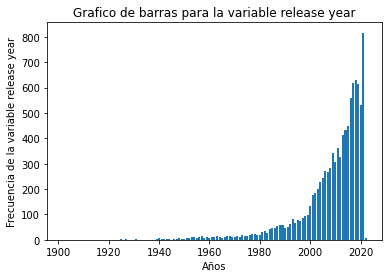

In [26]:
# Diagrama de barras es para cualitativas y histograma es cuantitativa
eje_x = np.array(pd.value_counts(pd.to_datetime(movies.releaseDate).dt.year).keys())
eje_y = pd.value_counts(pd.to_datetime(movies.releaseDate).dt.year)

plt.bar(eje_x, eje_y)
plt.rcParams['figure.figsize'] = (10, 10)
plt.ylabel('Frecuencia de la variable release year')
plt.xlabel('Años')
plt.title('Grafico de barras para la variable release year')
plt.show()

### 4.6 (9 puntos) ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico 

- Se agrega el primer genero de las peliculas en una nueva columna y se determina cuales son los generos de las 20 peliculas mas recientes.
- Para las primeras 20 se puede determinar con la tabla y la grafica que el genero predominante es el de **Comedia** seguido por **Drama** 
- El genero que predomina en todos los datos es **Drama**

In [27]:
movies['firstGenre'] = movies['genres'].str.split('|', n=-1).str[0]

In [51]:
top20 = movies.sort_values('releaseDate', ascending=False)[['title', 'firstGenre', 'releaseDate']].head(20)
top20

,title,firstGenre,releaseDate
9516,A Shot Through the Wall,Drama,2022-01-21
9545,Presque,Comedy,2022-01-19
9197,Italian Studies,Drama,2022-01-14
9808,See for Me,Thriller,2022-01-07
9586,American Siege,Action,2022-01-07
9982,Harry Potter 20th Anniversary: Return to Hogwarts,Documentary,2022-01-01
9951,WWE Day 1 2022,Action,2022-01-01
9257,Return of Chucky,NaN,2021-12-31
9241,"Karem, La Posesión",NaN,2021-12-31
9866,Gabriel's Rapture: Part One,Romance,2021-12-31


In [52]:
dataGenre = pd.value_counts(top20.firstGenre)
dataGenre

Comedy         6
Drama          4
Action         3
Thriller       1
Documentary    1
Romance        1
Animation      1
Horror         1
Name: firstGenre, dtype: int64

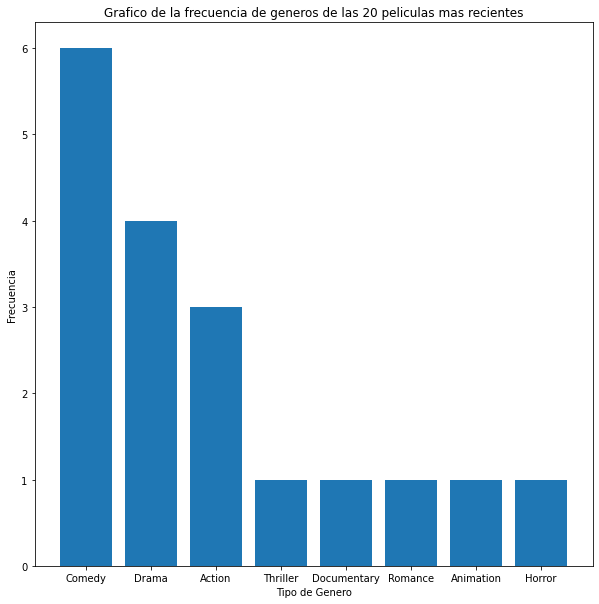

In [53]:
eje_x = np.array(dataGenre.keys())
eje_y = dataGenre
 

plt.bar(eje_x, eje_y)
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de Genero')
plt.title('Grafico de la frecuencia de generos de las 20 peliculas mas recientes')
plt.show()

In [26]:
movies['firstGenre'] = movies['genres'].str.split('|', n=-1).str[0]

In [32]:
allFirstGenre = movies.sort_values('releaseDate', ascending=False)[['title', 'firstGenre', 'releaseDate']]
dataFirstGenre = pd.value_counts(allFirstGenre.firstGenre)
allFirstGenre

,title,firstGenre,releaseDate
9516,A Shot Through the Wall,Drama,2022-01-21
9545,Presque,Comedy,2022-01-19
9197,Italian Studies,Drama,2022-01-14
9808,See for Me,Thriller,2022-01-07
9586,American Siege,Action,2022-01-07
...,...,...,...
526,The Gold Rush,Adventure,1925-07-12
355,Nosferatu,Drama,1922-02-17
1800,The Kid,Comedy,1921-01-21
133,The Cabinet of Dr. Caligari,Drama,1920-02-27


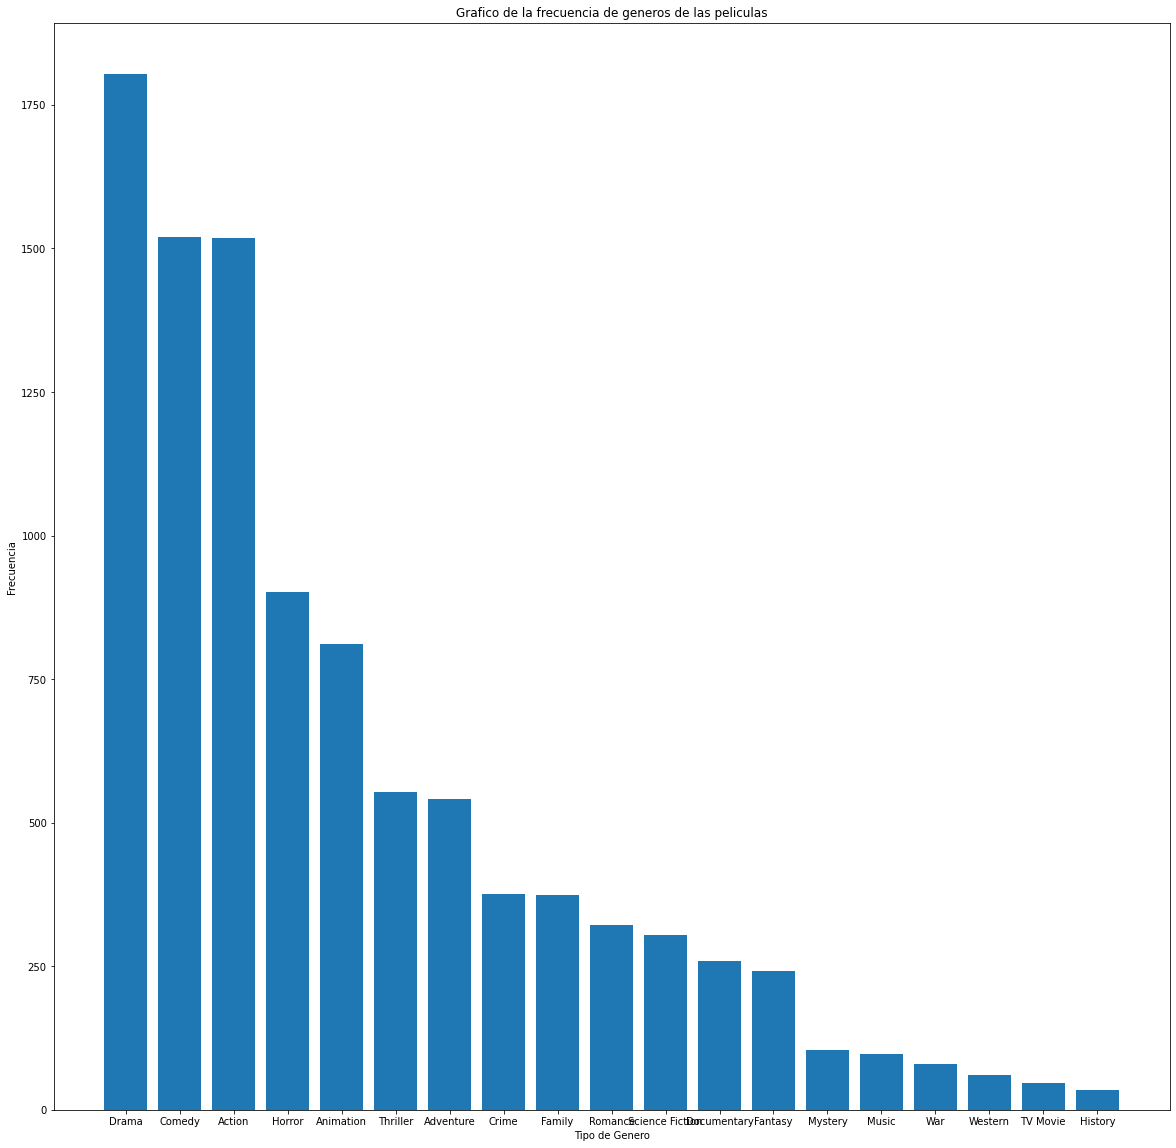

In [38]:
eje_x = np.array(dataFirstGenre.keys())
eje_y = dataFirstGenre
 
plt.rcParams['figure.figsize'] = (20, 20)
plt.bar(eje_x, eje_y)
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de Genero')
plt.title('Grafico de la frecuencia de generos de las peliculas')
plt.show()

### 4.7 (8 puntos) ¿Las películas de qué genero principal obtuvieron mayores ganancias?

- La pelicula que tuvo mejores gancias fue Avatar de genero **accion**
- Lo cual cuadra debido a que entre las 30 peliculas con mejores ganancias el genero que predomina el el de **accion** seguido de **aventura**

In [81]:
moreRevenue = movies.sort_values('revenue', ascending=False)[['title', 'firstGenre', 'revenue']].head(30)
moreRevenue

,title,firstGenre,revenue
3210,Avatar,Action,2.847246e+09
5952,Avengers: Endgame,Adventure,2.797801e+09
307,Titanic,Drama,2.187464e+09
4947,Star Wars: The Force Awakens,Action,2.068224e+09
5953,Avengers: Infinity War,Adventure,2.046240e+09
4914,Jurassic World,Action,1.671713e+09
7134,The Lion King,Adventure,1.667635e+09
9049,Spider-Man: No Way Home,Action,1.631853e+09
3397,The Avengers,Science Fiction,1.518816e+09
5087,Furious 7,Action,1.515048e+09


In [82]:
moreRevenue.firstGenre.value_counts()

Action             16
Adventure           5
Science Fiction     3
Family              3
Drama               1
Fantasy             1
Animation           1
Name: firstGenre, dtype: int64

### 4.8.  (3 puntos) ¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho películas con más actores en los últimos años?

- La cantidad de actores **no** influye en los ingresos de la pelicula. Esto se puede determinar debido a que al ordenar la tabla en base al revenue y mostar los datos de cantidad de artistas se ven muchas diferencias  se puede obsevar que no van en aumento o se mantienen en un numero gande.
- Para la segunda pregunta se puede decir que **no** aun que los ultimos 3 años sin contar 2022 si han tenido un aumento en la cantidad de actores, los años anteriores no siguen el mismo patron. Años anteriores a 2018, han tenido mas actores sin embargo en esos años tambien se sacaron mas peliculas.

In [122]:
movies.sort_values('revenue', ascending=False)[['actorsAmount', 'revenue']].head(20)

,actorsAmount,revenue
3210,37,2.847246e+09
5952,103,2.797801e+09
307,116,2.187464e+09
4947,188,2.068224e+09
5953,65,2.046240e+09
4914,48,1.671713e+09
7134,20,1.667635e+09
9049,59,1.631853e+09
3397,113,1.518816e+09
5087,57,1.515048e+09


#### codigo pregunta 2

In [ ]:
movies['yearRelease'] = pd.to_datetime(movies.releaseDate).dt.year
movies.sort_values('yearRelease', ascending=False)[['title', 'yearRelease', 'releaseDate', 'actorsAmount', 'revenue']].head(50)


In [62]:
year2022 = movies['yearRelease'] == 2022
print(movies[year2022].actorsAmount.count())
print(movies[year2022].actorsAmount.sum())

7
85


In [63]:
yaer2021 = movies['yearRelease'] == 2021
print(movies[yaer2021].actorsAmount.count())
print(movies[yaer2021].actorsAmount.sum())

816
2601837


In [114]:
pd.value_counts(movies.sort_values('yearRelease', ascending=False)[['title', 'yearRelease', 'releaseDate', 'actorsAmount']].head(50).yearRelease).head(10)

2021    43
2022     7
Name: yearRelease, dtype: int64

In [117]:
summovies = movies.groupby(by=['yearRelease']).sum().groupby(level=[0]).cumsum()
summovies.query('yearRelease > 2015')

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
yearRelease,,,,,,,,,,,
2016,198774002,9915684335,3.030646e+10,55076,19009.220,3525.8,783770,1383,1864,1098,2290345
2017,255113237,9171939874,3.096848e+10,61298,21139.893,3953.1,784731,1584,1970,1080,2220481
2018,295932065,8139812156,2.880042e+10,63035,20712.604,4040.7,666585,1597,2097,1153,2451055
2019,327235096,8037517661,2.869693e+10,61358,24540.496,4052.1,593907,1494,2050,1177,1290019
2020,332546367,3222917037,4.811586e+09,51395,28726.332,3536.6,290583,1303,1682,1085,1509624
2021,587763849,6344934286,1.395780e+10,75956,192928.057,5345.7,293021,1841,2485,1604,2601837
2022,5542411,0,0.000000e+00,718,1002.915,46.3,912,15,22,45,85


In [84]:
summovies['moviesCount'] = pd.value_counts(movies.yearRelease)
summovies.query('yearRelease > 2015')[['actorsAmount', 'moviesCount']]

,actorsAmount,moviesCount
yearRelease,,
2016,2290345,557
2017,2220481,618
2018,2451055,629
2019,1290019,612
2020,1509624,533
2021,2601837,816
2022,85,7


In [135]:
summovies.query('yearRelease > 2000').iloc[:,0].keys()

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='yearRelease')

In [134]:
summovies.query('yearRelease > 2000')[['actorsAmount']].actorsAmount.values

array([   5834,  493725,    5628,  694445,    6962, 2268102,    7919,
        804616, 1061917,   96648,  458149,  801031,  770668,  947559,
        631392, 2290345, 2220481, 2451055, 1290019, 1509624, 2601837,
            85], dtype=int64)

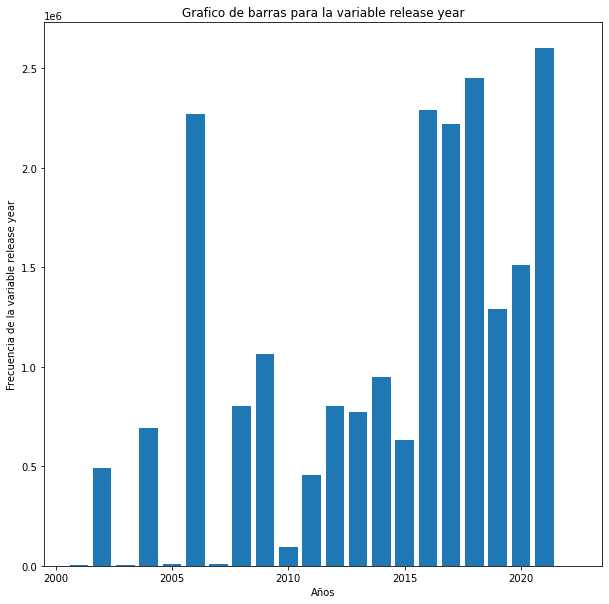

In [137]:
eje_x = np.array(summovies.query('yearRelease > 2000').iloc[:,0].keys())
eje_y = summovies.query('yearRelease > 2000')[['actorsAmount']].actorsAmount.values

plt.bar(eje_x, eje_y)
plt.rcParams['figure.figsize'] = (10, 10)
plt.ylabel('Frecuencia de la variable release year')
plt.xlabel('Años')
plt.title('Grafico de barras para la variable release year')
plt.show()

### 4.9.  (3 puntos) ¿Es posible que la cantidad de hombres y mujeres en el  reparto influya en  la popularidad y los ingresos de las películas? 

- En base a la grafica de calor y al diagrama de correlacion se puede determinar que si existe una cierta relacion entre el genero de los actores con la popularidad y los ingresos que tiene la pelicula, siendo esta menor al 0.5 pero si se pudo notar cierto nivel de relacion entre las variables.
- Si nos fijamos en las graficas de correlacion podemos observar que usualmente las peliculas con mayores ingresos y mas populares son las que tiene un mayor numero de actores masculinos. (siendo representados los hombre por los numero positivos y las mujeres los numeros negativos debido a la resta)

In [141]:
movies.sort_values('popularity', ascending=False)[['castWomenAmount', 'castMenAmount', 'popularity']].head(10)

,castWomenAmount,castMenAmount,popularity
8225,11,25,11474.647
9049,13,33,8443.740
7352,8,13,6055.643
7614,9,10,5887.379
8556,9,9,5804.441
7179,12,18,5051.222
9898,3,2,4789.705
8995,15,34,3828.374
8650,11,26,3062.764
9485,8,12,2466.985


C:\Users\ALIEWARE\AppData\Local\Temp\ipykernel_21556\3588629610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relacionHM['Diference'] = movies['castMenAmount'] - movies['castWomenAmount']


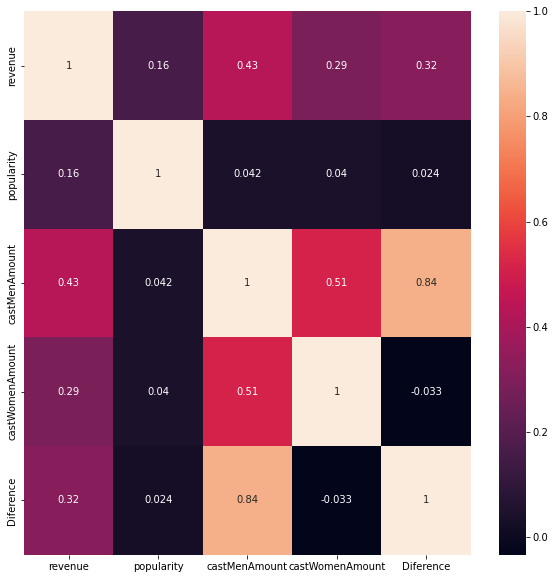

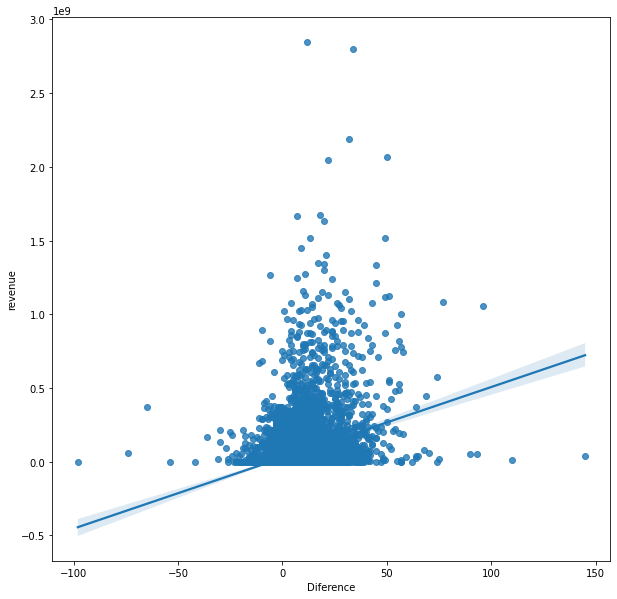

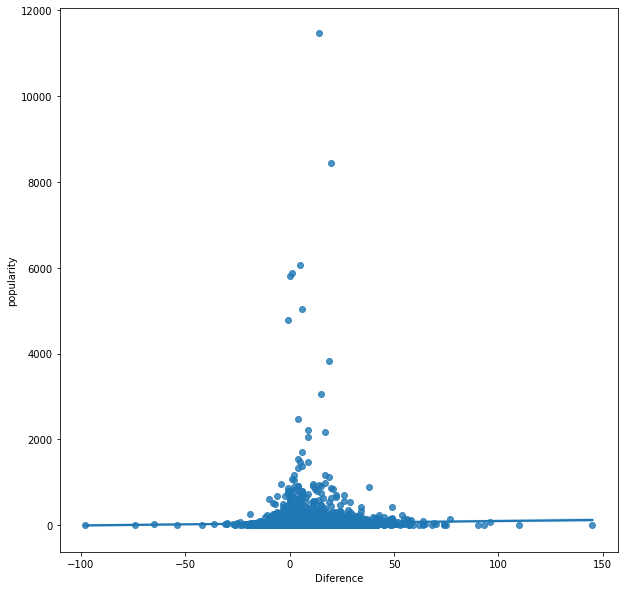

In [157]:
relacionHM = movies[['revenue', 'popularity', 'castMenAmount', 'castWomenAmount']]
relacionHM['Diference'] = movies['castMenAmount'] - movies['castWomenAmount']
hm = sns.heatmap(relacionHM.corr(), annot = True)
plt.show()

sns.regplot(x=relacionHM['Diference'], y=relacionHM['revenue'])
plt.show()

sns.regplot(x=relacionHM['Diference'], y=relacionHM['popularity'])
plt.show()